#### Run First to detect changes and reload modules

In [1]:
#ensure dependencies are installed
!pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.6/37.6 MB 18.9 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: scipy
    Found existing installation: scipy 1.11.1
    Uninstalling scipy-1.11.1:
      Successfully uninstalled scipy-1.11.1


In [2]:
# enable auto reload
%load_ext autoreload
# option 2 -  Reloads all modules except those explicitly excluded.
%autoreload 2

## Assignment 3 

Radif Masud 

## Visualization Techniques

> As part of the visualization layer of the workbook, I will have examples of different plots using libraries that are incrediably powerful and can bring large dataset together quickly. I am hoping as you look throgh this workbook you see the power of these visualizations and get a sense of why a picuture can be worth a thousand words.

> The visualizations will use primarily matplotlb and seaborn as primay rendering tools. With this workbook, we will see bar plots for large aggregate data. For example, single value aggregation by year, can be easily presented in vertical bar graph. A bar graph can good for quick aggregate however details are better suited in other plots. Another plot that is in this workbook is a jitter scattergraph. This a very powerful represent on data that has potentially heavy density at a coordinates and provide a point visual on the volume of occurances at each (x,y). One downside to a jitter scattergraph is the zoom level on the data. That means if we are looking at a dataset that has millions of rows with hundreds of thousands of occurances, the jitter may still resemble a continues wide line. Filtering on the data can help on that to get down to a reasonable view projection.
> Another visualization that is part of this workbook utilizes kernel density estimation via the seaborn libray. This combined with a normal distribution can provide a useful visualization to highlight kurtosis in the data.
> The last visualization is a heatmap to provide categorical analysis. The heatmap 
> 


## Visualization Libraries



> As part of our documentation, we want to call out the required libraries that make this workbook functional, how to install them and what they provide. As part of the workbook design you may not see the being directly referenced and that is by design to keep this workbook clean. Where possible the various libraries being referenced will be encapsulated in functions within the modules contained within this workbook's directory. As part of this workbook, no specific version of these libraries is required. The latest available should work for the functions.


| Module     | Install                                                       | Description                                                                                                    |
|------------|---------------------------------------------------------------|----------------------------------------------------------------------------------------------------------------|
| requests      | <div style="text-align: left">`pip install requests` </div>      | <div style="text-align: left">Python based HTTP client </div>             |
| pandas     | <div style="text-align: left">`pip install pandas` </div>     | <div style="text-align: left">Powerful data structures for data analysis, time series, and statistics  </div>  |
| matplotlib | <div style="text-align: left">`pip install matplotlib` </div> | <div style="text-align: left">Python plotting package </div>                                                   |
| seaborn    | <div style="text-align: left">`pip install seaborn` </div>    | <div style="text-align: left">Statistical data visualization </div>                                            |
| numpy      | <div style="text-align: left">`pip install numpy` </div>      | <div style="text-align: left">Foundational module for dealing and working with large arrays </div>             |
| scipy      | <div style="text-align: left">`pip install scipy` </div>      | <div style="text-align: left">Fundamental algorithms for scientific computing in Python </div>             |
| panel      | <div style="text-align: left">`pip install panel` </div>      | <div style="text-align: left">Powerful data exploration & web app framework for Python </div>             |
| ipython      | <div style="text-align: left">`pip install ipython` </div>      | <div style="text-align: left">IPython: Productive Interactive Computing </div>             |
| ipywidgets      | <div style="text-align: left">`pip install ipywidgets` </div>      | <div style="text-align: left">Jupyter interactive widgets </div>             |
| watermark      | <div style="text-align: left">`pip install watermark` </div>      | <div style="text-align: left">IPython magic function to print date/time stamps and various system information. </div>             |



An additional easy way to  install all of these in one command is via the requirements.txt. The provided file contains all the detected dependecies and their versions at the time this workbook was created. 
```
pip install -r requirements.txt
```


## Demonstration

> In this workbook, I wanted to present different graphical representations of traffic crash information for the City of Chicago. Chicago is an incredibly large city in Illinois and one in the top 5 of the largest cities in the United States. Naturally there are a lot of visitors and residents the come to the city. Chicago is also a well established hub for mass transit that supports many of the residents and commutars that come to the city to visit or work. However like many cities in the United States, accidents happen. As part of this workbook, I will use different visualization techniques and processing of the data the abilities the libraries used.  Some of the graphics will be more straightforward and other will grow in the depth of complexity.

> Some of the goals of this workbook are to provide a user set of tools that can be used as a point of refence as well. Code specific functionality as well techniques on how to implement them within python and a jupyter environment.




 ### Supporting Code - Modules

> To create clean seperation, the code functions mentioned in the cell can be located in:


```
./
├─ modules/
│  ├─ reusable.py
│  ├─ __init__.py
├─ assets/
│  ├─ data/
│  ├─ chicago_traffic_crashes.csv
├─ static/
│  ├─ *.png
```

> * The modules directory contains all the code referenced in this workbook. The resuable.py file contains all the functions referenced in the working book and is brought into the workbook via this line of code:

```
from modules.reusable import *
```
> * The assets/data folder contains any referencable datasets and is also where downloaded data should be placed if done manually or via the functions.
> * The static directory is used to store static images referenced in this workbook.


**If you decide to add functions to reusable.py or modify them, depending on your python and jupyter setup, you may need to restart your kernel to get the latest changes pulled in and reloaded**



In [3]:
#***********************************************************
# execute the primary import of the required libaries
# this will import all of the library functions needed for:
# * data and visualization
#***********************************************************

# reusable functions
from modules.reusable import *


### Data - Retrieval

> This workbook contains a reusable function that will connect to a free and open souce dataset available from the City of Chicago.
Via the requests module, this workbook can call and invoke the download the file like the web UI.

In [4]:
# if the data is not present in the assets/data we will retrieve it
# the Dataset can be large from the City of Chicago and depending on you internet connection, could take a minute.
download_chicago_crashdata()


CSV present in assets/data/chicago_traffic_crashes.csv.


### Data - Parsing

> As part of the data presentation, pandas offers a robust set of tools and combined with programatic abilities in python, we can enhance a dataset to reduc UI and code noise. As part of the dataset from the city of Chicago data coming in is in the form of CSV and times we will want to have some of the fields sub parsed or in a more performant format like a date time. As part of the reuseable.py, those transoformations and mutations will occur in function called etl_crash_data.

**example code**
```
    """
    Does some transformation and extraction of additional data into our crash dataset that can be helpful for visualizations
    Args:

        df (pandas dataframe): Dataframe to modify and pass back to the caller
    Returns:
        A modified dataframe with some additional enriched data.
    """

    # pass in the format - faster to load seconds over minutes.
    df['CRASH_DATE'] = pd.to_datetime(df['CRASH_DATE'],format="%m/%d/%Y %I:%M:%S %p")
    df['CRASH_YEAR'] = df['CRASH_DATE'].dt.year
    df['CRASH_YEAR'] = df['CRASH_DATE'].dt.year
    df['CRASH_DAY_NAME'] = df['CRASH_DATE'] .dt.day_name()
    df['CRASH_MONTH_NAME'] = df['CRASH_DATE'].dt.month_name()

    # we want to ensure our numeric data is properly set to 0 if NaN is encountered
    # not doing this can impede or cause errors in heatmaps and histograms
    df['INJURIES_TOTAL'] = df['INJURIES_TOTAL'].fillna(0)
    df['INJURIES_FATAL'] = df['INJURIES_FATAL'].fillna(0)
    df['INJURIES_INCAPACITATING'] = df['INJURIES_INCAPACITATING'].fillna(0)
    df['INJURIES_NO_INDICATION'] = df['INJURIES_NO_INDICATION'].fillna(0)
    df['INJURIES_NON_INCAPACITATING'] = df['INJURIES_NON_INCAPACITATING'].fillna(0)
    df['INJURIES_UNKNOWN'] = df['INJURIES_UNKNOWN'].fillna(0)
    df['INJURIES_REPORTED_NOT_EVIDENT'] = df['INJURIES_REPORTED_NOT_EVIDENT'].fillna(0)

    return df
```

### Data - Loading

In [5]:
# load in the data into our local variable
# we will pass that to our reusable plotting functions throughout the workbook
# this dataset will have the etl from etl_crash_data applied to it
df_chicago_data = get_chicago_crash_data()

# let's take a peek at the data
df_chicago_data.head(5)

,CRASH_RECORD_ID,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION,CRASH_YEAR,CRASH_DAY_NAME,CRASH_MONTH_NAME
0,00a530520c84927490b597a6220ff3f2a3347472ef3086...,NaN,2025-01-15 13:50:00,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,FIXED OBJECT,RAMP,...,0.0,13,4,1,41.816073,-87.656743,POINT (-87.656742699936 41.816073475493),2025,Wednesday,January
1,00c996c2b04c2d3b5a5fc96d35b2b538e2c0f34703b885...,NaN,2023-07-15 23:00:00,15,NO CONTROLS,NO CONTROLS,UNKNOWN,"DARKNESS, LIGHTED ROAD",REAR TO SIDE,PARKING LOT,...,0.0,23,7,7,41.758974,-87.577299,POINT (-87.577299189217 41.758973539258),2023,Saturday,July
2,027187f52f9cac9ec542f1dda3a9ca8804db1fc2d2a386...,NaN,2020-05-31 01:13:00,30,TRAFFIC SIGNAL,UNKNOWN,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,FOUR WAY,...,0.0,1,1,5,41.878326,-87.701280,POINT (-87.701279794376 41.878326229569),2020,Sunday,May
3,204c3ca48ff3cdf0737e7f10b54ef5f8c49fbe30b5e53e...,NaN,2024-12-04 17:39:00,30,UNKNOWN,UNKNOWN,RAIN,"DARKNESS, LIGHTED ROAD",TURNING,NOT DIVIDED,...,0.0,17,4,12,NaN,NaN,NaN,2024,Wednesday,December
4,0235f4b4460f50115c7f6cb0d2bedeea7ce92b9b0f5943...,NaN,2025-01-15 18:40:00,25,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,FOUR WAY,...,0.0,18,4,1,41.846038,-87.724761,POINT (-87.724761370522 41.846037568964),2025,Wednesday,January


### Figure 1 - Plot of Annualized Traffic Crashes All Years

> We want to better understand how the city of Chicago is doing with car crashes year over year. We can accomplish this with by aggregating our dataset on the CRASH_YEAR and determine overall counts and further annotate our plot with the % of change. 
> * Questions we can look to answer?
>   * Are there holes in the data?
>   * Are outliers present or are there extreme changes + or - ?
>     * Are those changes explainable?

In [6]:
#our primary column of aggregation is the CRASH_YEAR
# we can look at aggregate of the instance counts by year
cell_crash_counts_by_year = df_chicago_data['CRASH_YEAR'].value_counts().sort_index()

# via describe we get our high level stats.
cell_crash_counts_by_year.describe()

count        13.000000
mean      71429.230769
std       48415.872666
min           2.000000
25%       21891.000000
50%       92093.000000
75%      110747.000000
max      118950.000000
Name: count, dtype: float64

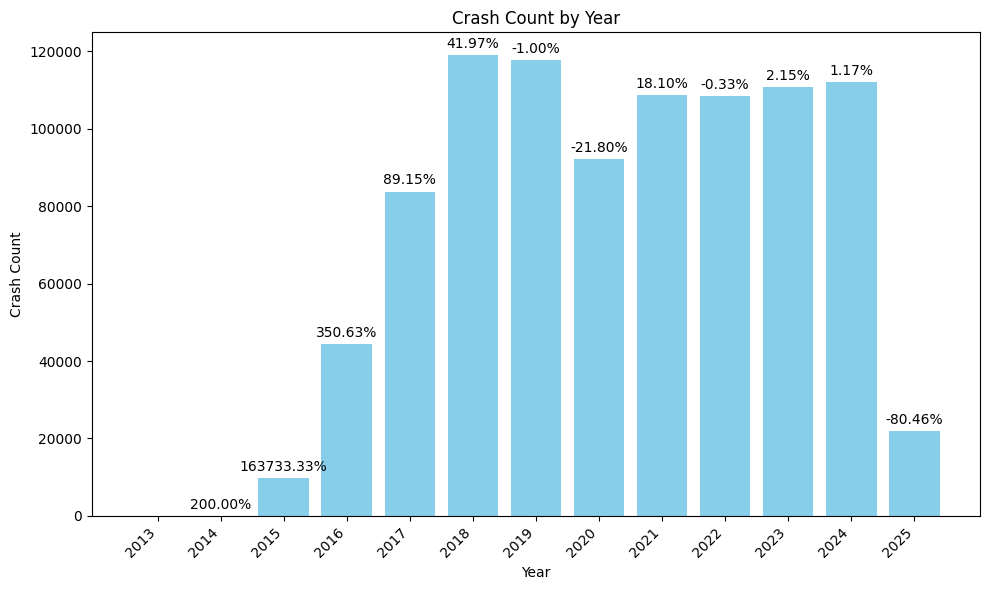

In [7]:
# use the reusable function and pass in our dataset
plot_crash_count_by_year(df_chicago_data)

#### Crash count analysis

> The simple plot reveals some intersting data points.
>> * As part of the plot, the % of change is added. The initial % of change it very large. Data collection appears to really be from 2015 forward. There is some data from 2012->2015 but it appears to be incomplete.
>>    * **Using % can be misleading because looking at 2014 to 2015, the change is massive.** Does that mean that Chicago was having an immediate accident crisis? No. The data is more likely incomplete withing the dataset and an idicator that the data from 2016 forward is really a better starting point for analysis.
>>    * The spike between 2016 and 2017 may have been influenced by a well known baseball team breaking a 108 year streak of not winning a world series and an increase of visitors to Wrigley Field from all over the country the following year.
>>    * Additional factors could be a lower gas price in 2017 that increased drivers visiting the city
>>    * https://data.theadvertiser.com/gas-price/chicago/YORD/2023-02-06/  
>> * 2020 has an interesting dip
>>   * What could cause this? The global covid-19 pandemic resulted in a global slowdown and near stoppage of human movement. We can see that impact to the city for events and in office work and how the influenced a lower nummber of car crashes.
>>   * [Chicago traffic, CTA patterns dramatically affected by COVID pandemic](https://abc7chicago.com/chicago-traffic-construction-cta-bus-tracker/10451178/)
>> * Data collection for 2025 is ongoing and running this workbook at later points in 2025 or beyond may contain additional data

### Figure 2 - Injury density by hour of the day

> With our crashe data, we can in general there are a lot of crashes. Bar plots make the difficult. Similar to having a single Bin size. So we want to look our data at a smaller scale. The hour by day plot with a jitter can help us in understand what hours have mor observations of incidents.
> * Questions we can look to answer

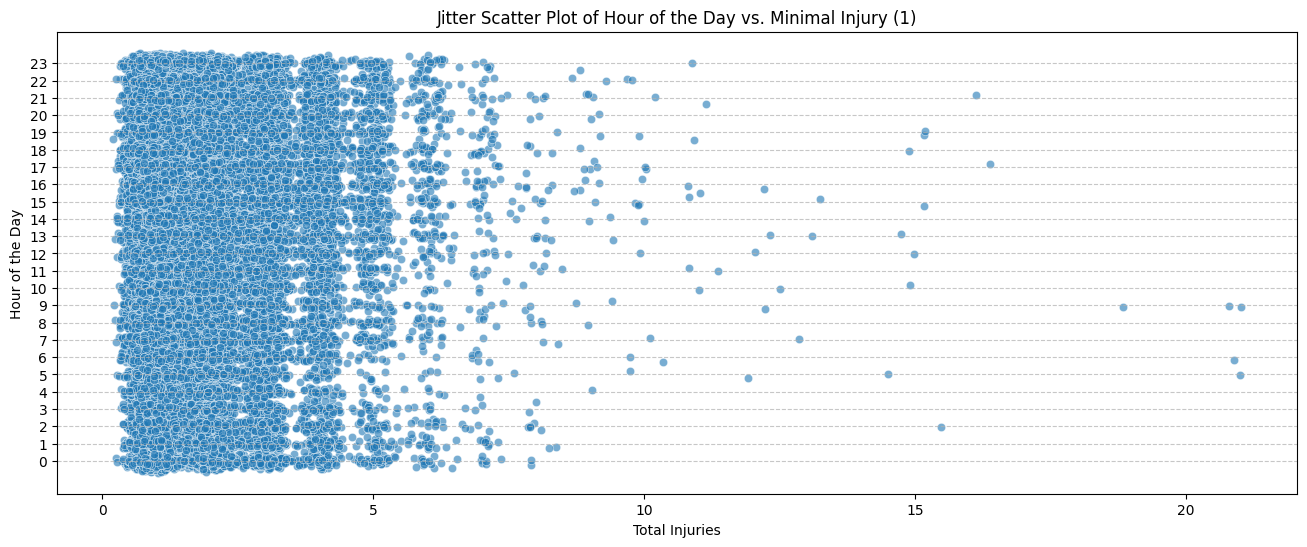

In [8]:
#use the reusable function will evaluate all years and filter initially on crashes with >=1 injuries

# all injuries
plot_crash_hour_of_day_vs_injuries_with_jitter(df_chicago_data)

> We can see that irrespective of hour the day, across all years, < 5 injuries is heavily saturated in observed incidents. One of the challenges of a jitter visualizations stems from the zoom level on the data being evaluated. In the initial jitter plot, we are looking at all years and >= 1 injuries. If we scope it down two fold by year an the minimal injury count, we should be able zoom into the data and get a better idea if patterns emerge. 

In [10]:
# call the reusable function to enable the pywidgets to filter on year and injury counts
# this will setup an options section with panel and display in a row 2 interactive filters
# filter 1: year (bound to the unique list of all years within the dataset
# filter 2: injury count (static range of 1 to 30)
# as the user interacts wtih the filters the selected year and injury count will filter the dataset and replot the data
setup_interactive_jitter(df_chicago_data)

Row(styles={'background': '...})
    [0] Markdown(str)
    [1] IPyWidget(Dropdown)
    [2] IPyWidget(IntSlider)

Output()

#### Crash hour analysis

> In overall, the hourly crashes to total injuries shows consentrated rate when the injury count 1 or more. Now if we look at 2023 as an exmple and ask the question of "In 2023, what hours had 4 or more injuries, we see that the afternoon hours (13 - 16) demonstrate a cluster of injuries. Rush hours of employees leaving the office of the day is most logical conclusion. 


> * What hours should I avoid?
> * 3pm to 6pm have a visibly larger number of injuries. 

> **Image found in static/2023_minimal_4_injury.png**

> ![alt text](static/2023_minimal_4_injury.png)



### Figure 3 - Probability Distribution (Hour of Day)

As we examined the jtter, it raises a question about the hour of day and the overall probability of an car accident occurring. To help answer that question we can utilize a histograme in combination with a kernel density esitimation and a normal distribution. 

We can look to anwer questions like:
* Filtering by year, are  there times of the day that pose more risk for a car accident?
* Filtering by year, what level of kurtosis is present in the data?



In [12]:
# use the reusable function to setup a widget control histogram
# filter 1: year (bound to the unique list of all years within the dataset
# plot a histogram of the crash data for the selected year
# calculate the normal distribution and kurtosis value
setup_histogram_crashes_by_year(df_chicago_data)

Row(styles={'background': '...})
    [0] Markdown(str)
    [1] IPyWidget(Dropdown)

Output()

#### Probabilty analysis

> Where do we see the most risk traveling in the city in vehicle?
> * We can see using a kernel densisity with normal distribution, the time morning rush hours of 7 to 8 am pose a range of risk in the morning. We can also see the afternoon hours starting from 3pm to 6 or 7pm are the next risk windows.
> When can we have travel with the lowest risk?
> * If we have to travel to the city of Chicago and we want to minimize our risk, we should trave to and from the city between 10 and leave before 3pm.


### Figure 4 - Heatmap Weather Conditions to Road Conditions

To help use understand a possible source of car crashes. We can utilize two data categories prp

In [13]:
# use the reusable function to setup a widget powered plot to allow you filter by year
# this method is specifically targeting the road conditions in comparison to the 
# filter 1: year (bound to the unique list of all years within the dataset
# plot a heatmap for the selected year with specific catergorical data: Weather and Road surface conditions.
setup_heatmap_weather_road_condition_by_year(df_chicago_data)

Row(styles={'background': '...})
    [0] Markdown(str)
    [1] IPyWidget(Dropdown)

Output()

#### Heatmap Analysis

> The heatmap reveals an interesting property of the data and possible assumptions. 
> * Does the weather or road condition play role?
> * Looking at various years, the large number of accidents occur in dry and clear conditions. The dataset lacks additional data around the volume of traffic at peak windows of traffic accidents.
> * 2013 and 2014 are clearly not valid data years. 


In [14]:
# let's call our reusable function that will analyze the probability by hour of the 


## Rules Adherence


> As part of building a reusable and repeatable workbook, we want to adhere to rules that will help us a data scientists collect, present, and share our findings with peers. As part of this workbook, these are the key rules that helped guide the final product.

### Rule 1 (Telling a story)

> Knowing our audience and how to craft computational narrative is key. The rule on story telling is about knowing our audience and presenting complex layers of data in a meaningful way that convey information. As part of this workbook, as the data is presented, I want to provide information around what is the intent of the presented model, how it was produced and present possible questions they can answer from the data. Like a story, I aimed to explain what problems that I might have encountered and steps I needed to take. This will help establish the how, the what and why.



### Rule 2 (Document the process)

> The documentation rule is about providing the context and flow of where I got the data, how the data was transformerd, and loaded into the environment. Similar to a term paper or other historical stories, we want to provide the footnotes on where we sourced information and how we obtained it. This is important to establish legitimacy on the outputs. As part of this workbook, context around specific processing are called out to help educate the reader and provide them samples and sources as well that they can reference.


### Rule 3 (Use Cell Divisions)

> The rule of cell division helps us establish a cleaner set of areas in the workbook. Each cell can act as boundary of information and points of focus. To help keep cells clean, functional areas that can call a function help reduce the initial UI noise. We want to keep cells from spanning multiple scrolls to provide a user a section by section viewing experience.


### Rule 4 (Code Modularization)

> The rule for code moderation is  intended to keep complex code out of the direct view as well as give us clean separation of concerns. Creating concise, reusable, and parameterized functions allow the visual side of the workbook to stay more in presenting the data. The module code within the workbook directory helps us keep that clean. As part of this workbook, I created modules that worked in extract, transform, and loading spaces. The modules are part of the repo and also contain documentation within them to provide other users the ability to see how certain techniques are applied.



### Rule 6 (Version Control)

> The ability to restore and save a working set of code to demonstrate functionality is important in the developement community. Version control systems like Git or SubVersion offer that ability to store backups and branches of code that can worked on by different team members. Systems like Git provide free accounts to users to upload and share their work with the global community.
As part of this workbook, all the source code is available in a publicly available repository on Git and can be accessed at [siads_521_assignment_3](https://github.com/rmasud-michigan/siads_521_assignment_3.git).

In [15]:
# adding a watermark
%load_ext watermark
%watermark -v -p jupyterlab

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 8.12.3

jupyterlab: 4.3.6

